# HackerNews Score Distribution Analysis

This notebook analyzes the distribution of HackerNews post scores using data from `summary-scores.csv`.

## Import Required Libraries

Import pandas for data manipulation and matplotlib.pyplot for visualization.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## Load the Dataset

Use pandas to load 'summary-scores.csv' into a DataFrame and inspect the first few rows.

In [5]:
# Load the summary-scores.csv file
df = pd.read_csv('./summary-scores.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst 10 rows:")
print(df.head(10))

print("\nDataset info:")
print(df.info())

print("\nBasic statistics:")
print(df.describe())

Dataset shape: (1862, 2)

First 10 rows:
   score    count
0     -1        1
1      0      440
2      1  1267462
3      2   959621
4      3   447302
5      4   208190
6      5   113948
7      6    73267
8      7    52891
9      8    40376

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   score   1862 non-null   int64
 1   count   1862 non-null   int64
dtypes: int64(2)
memory usage: 29.2 KB
None

Basic statistics:
             score         count
count  1862.000000  1.862000e+03
mean   1036.792696  2.048656e+03
std     760.841013  3.872658e+04
min      -1.000000  1.000000e+00
25%     464.250000  2.000000e+00
50%     929.500000  7.500000e+00
75%    1429.750000  7.000000e+01
max    6015.000000  1.267462e+06


## Visualize Data with a Histogram

Use Matplotlib to create a histogram of the scores column from the loaded dataset.

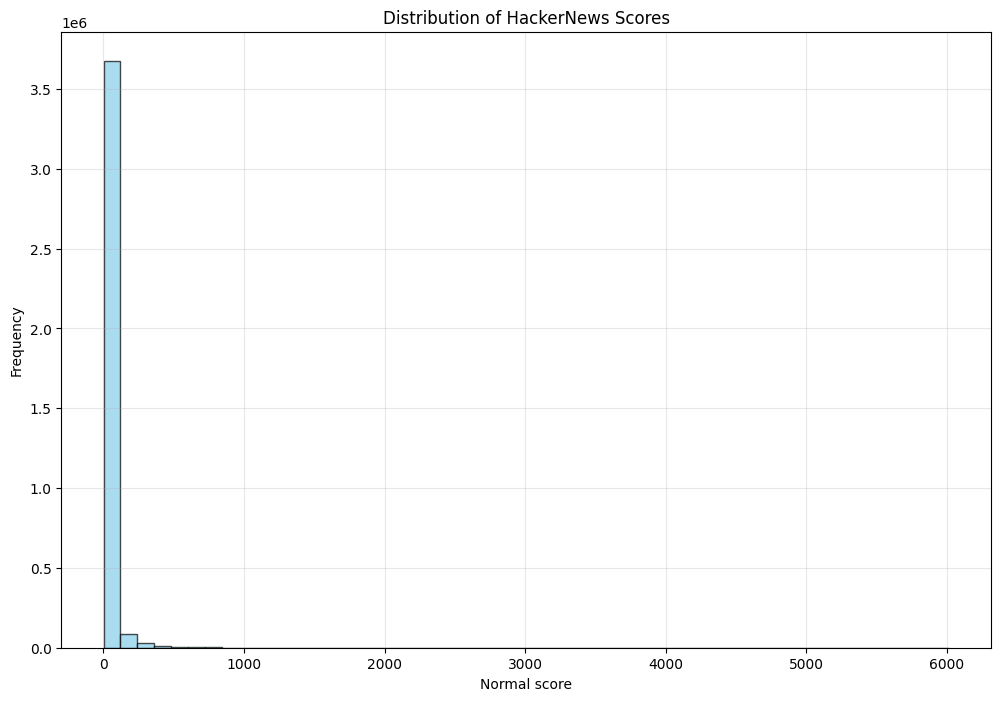

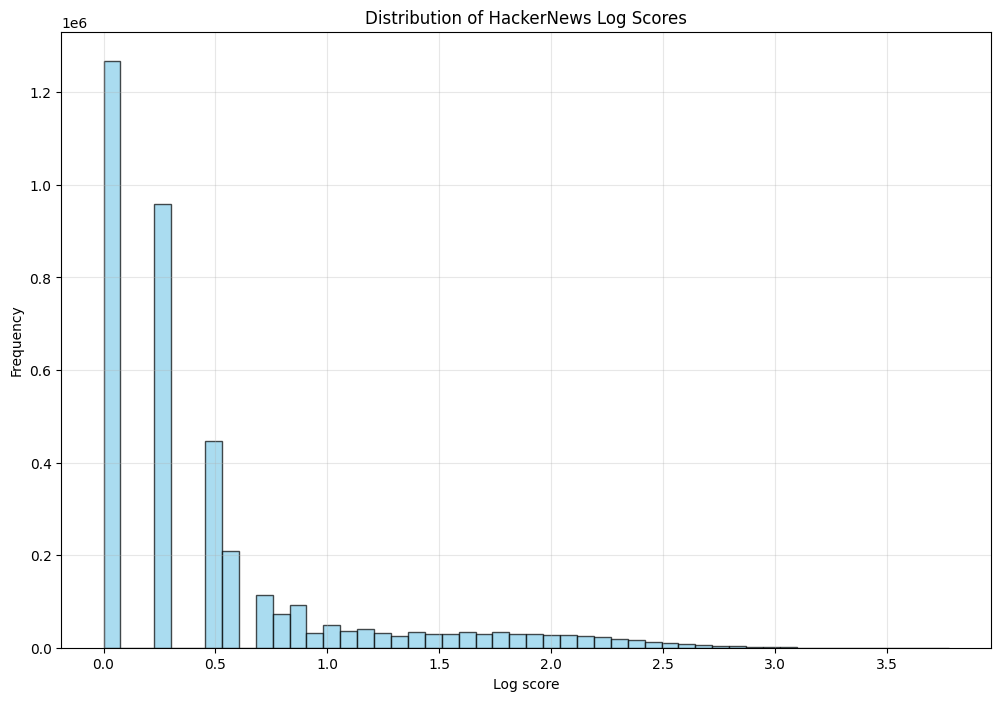

In [24]:
# Create a histogram of scores weighted by count
# Since we have aggregated data (score, count), we need to expand or weight the histogram

# Create arrays for plotting - repeat each score by its count
scores = []
log_scores = []
for _, row in df.iterrows():
    if row['score'] is None:
        continue
    score = int(row['score'])
    if score <= 0:
        continue
    scores.extend([score] * row['count'])
    log_10_score = math.log10(score)
    log_scores.extend([log_10_score] * row['count'])

# Convert to numpy array for better performance
log_scores = np.array(log_scores)

# Create the histogram of normal scores
plt.figure(figsize=(12, 8))
plt.hist(scores, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Normal score')
plt.ylabel('Frequency')
plt.title('Distribution of HackerNews Scores')
plt.grid(True, alpha=0.3)
plt.show()

# Create the histogram of log scores
plt.figure(figsize=(12, 8))
plt.hist(log_scores, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Log score')
plt.ylabel('Frequency')
plt.title('Distribution of HackerNews Log Scores')
plt.grid(True, alpha=0.3)
plt.show()